In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
pd.set_option('display.max_column', None)

In [35]:
ds = pd.read_csv('test.csv')
print(ds.shape)

(1460, 81)


In [36]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461.0,20.0,RH,80.0,11622.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal,208500
1,1462.0,20.0,RL,81.0,14267.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1958.0,1958.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal,181500
2,1463.0,60.0,RL,74.0,13830.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal,223500
3,1464.0,60.0,RL,78.0,9978.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,1998.0,1998.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal,140000
4,1465.0,120.0,RL,43.0,5005.0,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,1992.0,1992.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal,250000


### Missing Values

In [48]:
afeature_na = [feature for feature in ds.columns if ds[feature].isnull().sum()>1]
for feature in feature_na:
    print(feature, np.round(ds[feature].isnull().mean(), 4), '% missing value %')

MSZoning 0.0 % missing value %
Alley 0.0 % missing value %
Utilities 0.0 % missing value %
Exterior1st 0.0 % missing value %
Exterior2nd 0.0 % missing value %
MasVnrType 0.0 % missing value %
BsmtQual 0.0 % missing value %
BsmtCond 0.0 % missing value %
BsmtExposure 0.0 % missing value %
BsmtFinType1 0.0 % missing value %
BsmtFinType2 0.0 % missing value %
KitchenQual 0.0 % missing value %
Functional 0.0 % missing value %
FireplaceQu 0.0 % missing value %
GarageType 0.0 % missing value %
GarageFinish 0.0 % missing value %
GarageQual 0.0 % missing value %
GarageCond 0.0 % missing value %
PoolQC 0.0 % missing value %
Fence 0.0 % missing value %
MiscFeature 0.0 % missing value %
SaleType 0.0 % missing value %


In [49]:
## replace missing values with label
def replce_feature(ds, feature_na):
    data = ds.copy()
    data[feature_na] = data[feature_na].fillna("Missing")
    return data
ds = replce_feature(ds, feature_na)
ds[feature_na].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

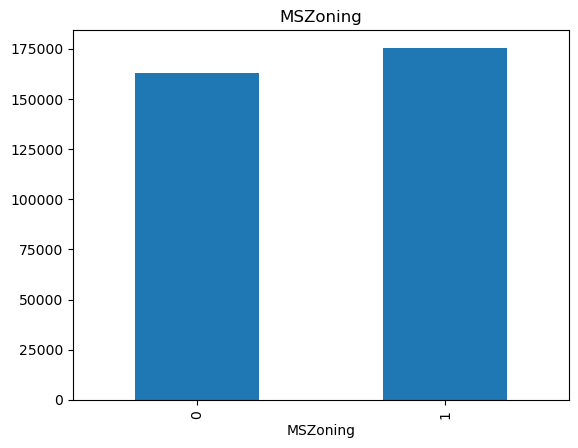

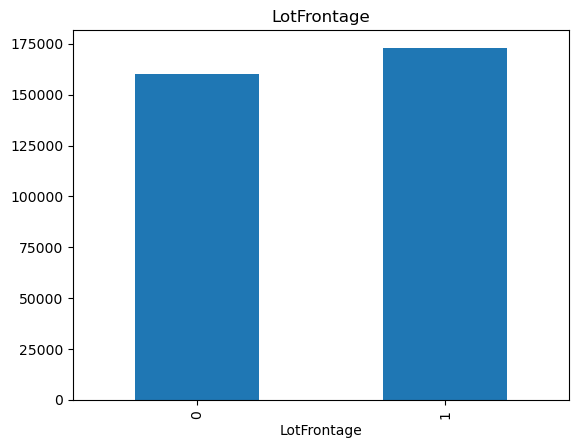

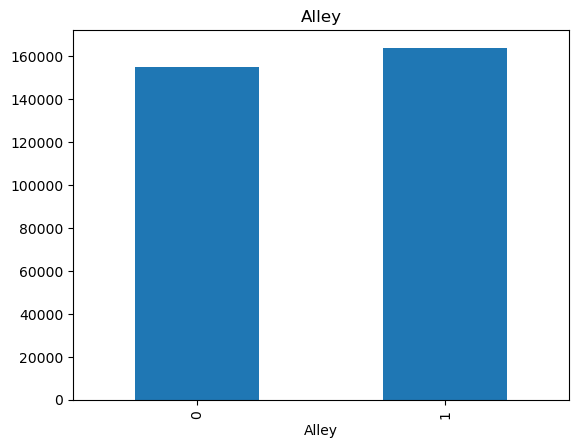

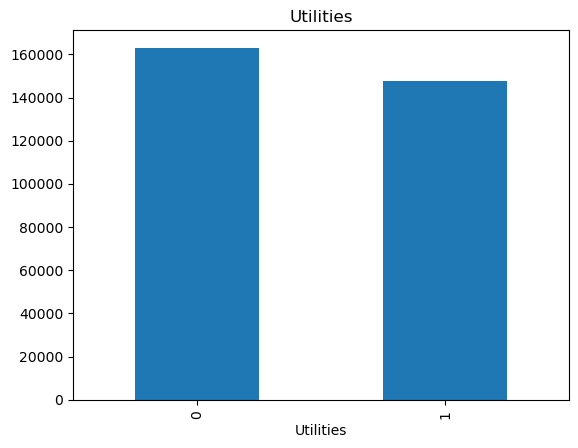

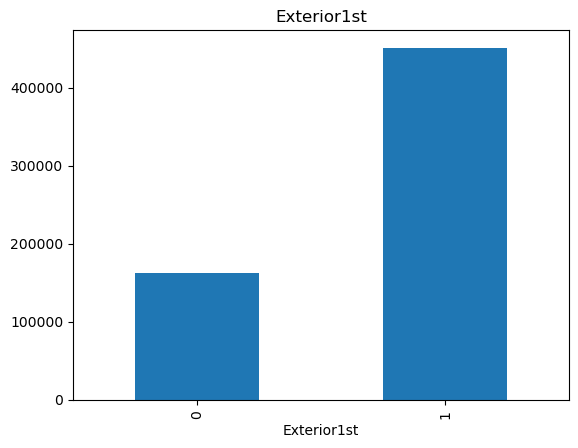

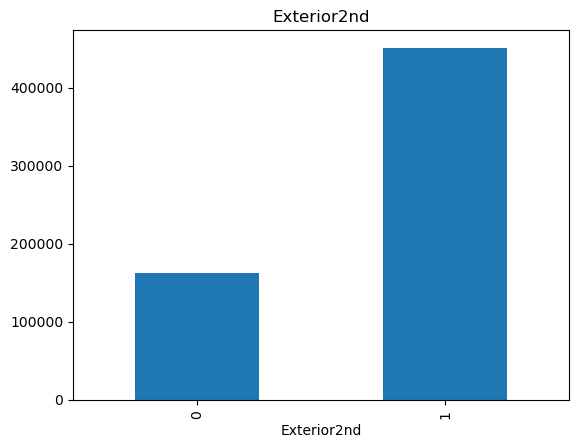

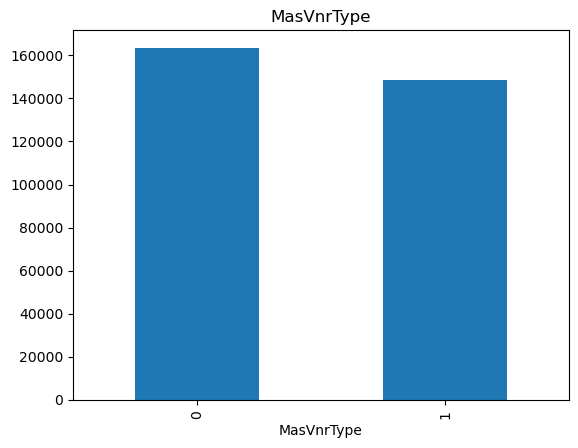

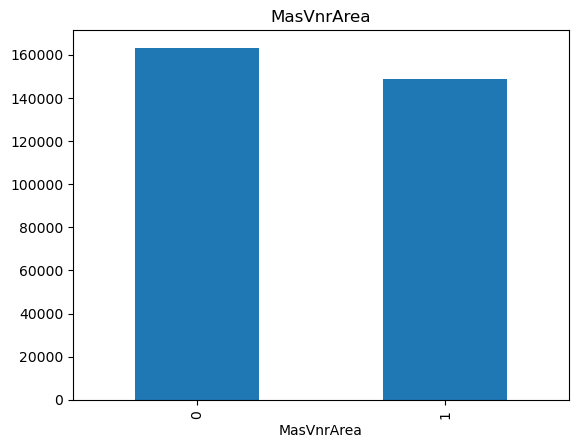

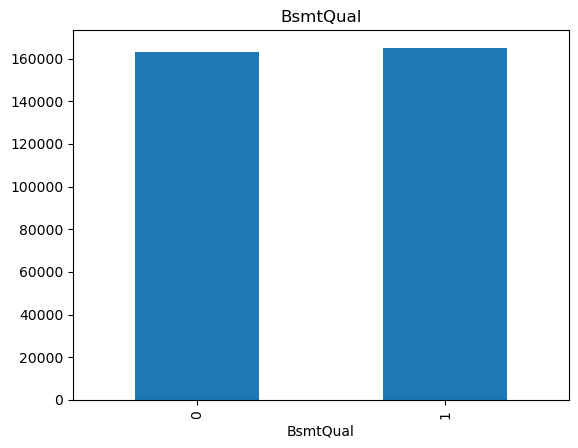

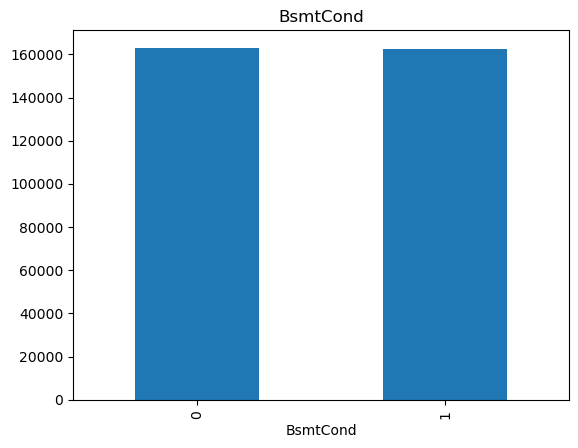

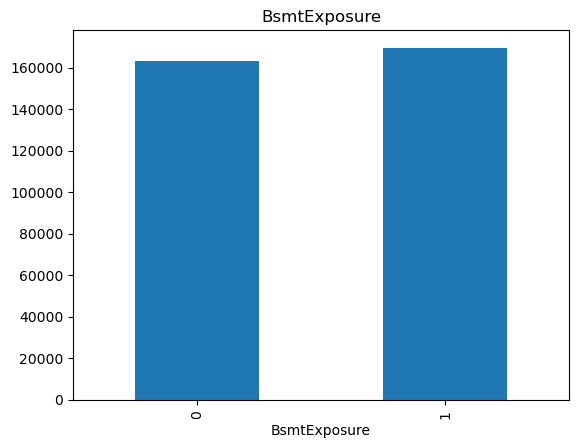

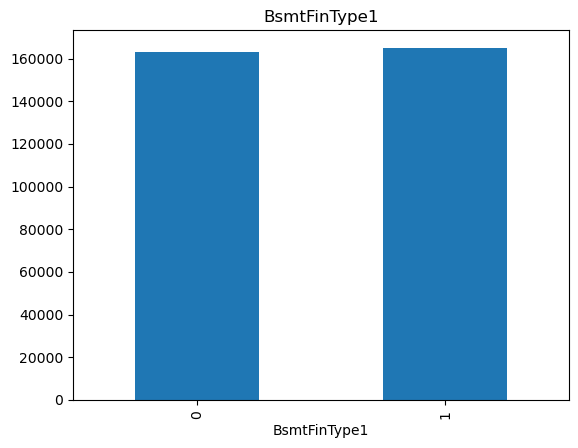

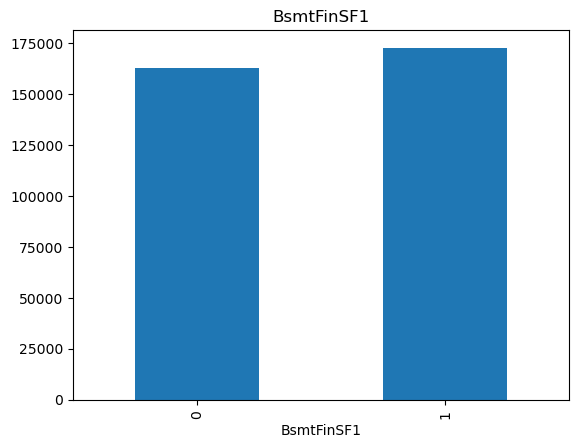

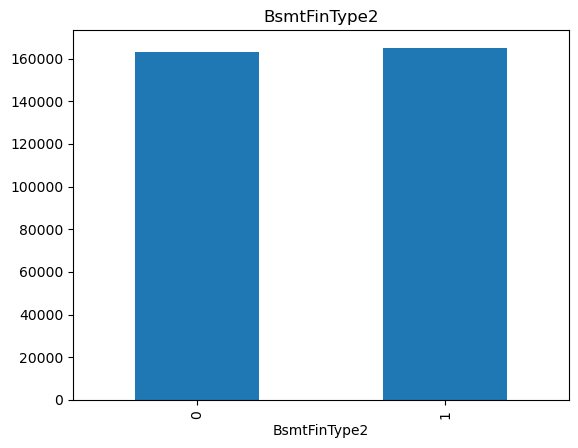

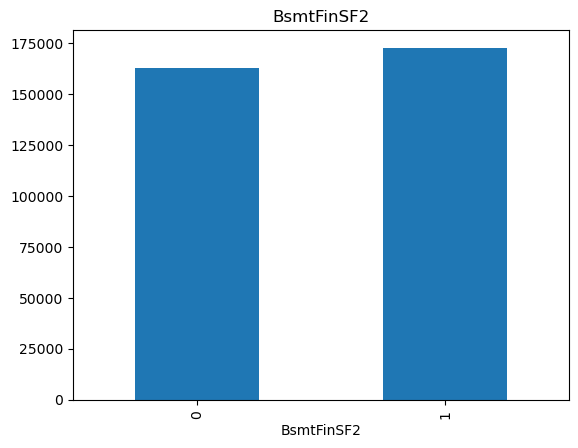

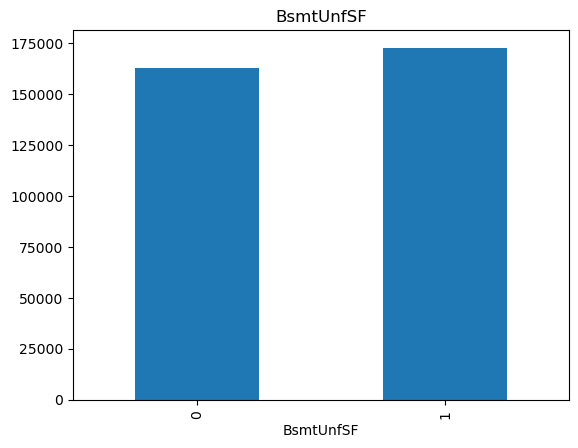

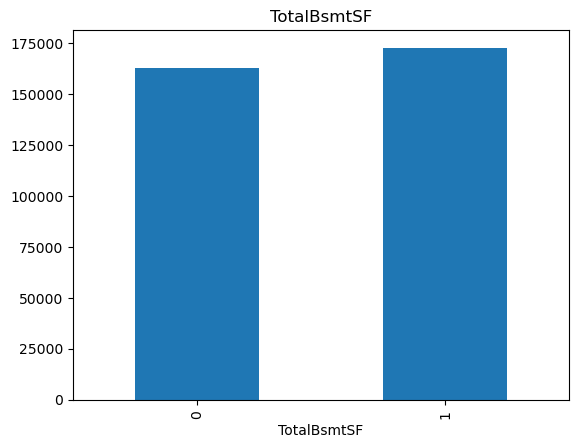

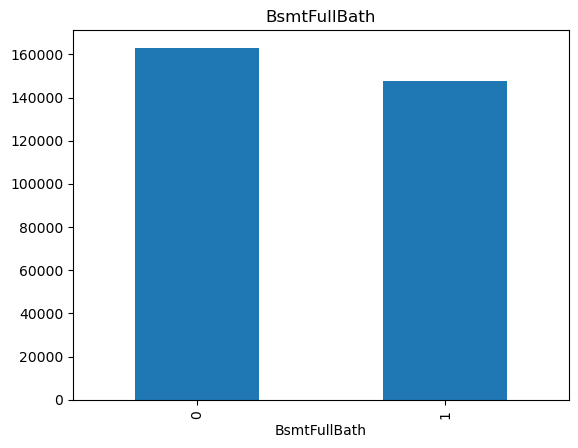

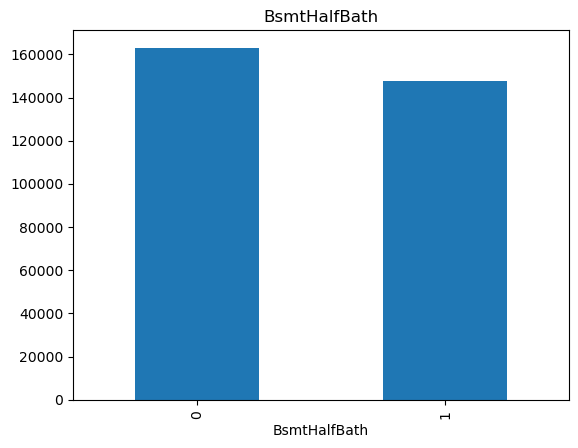

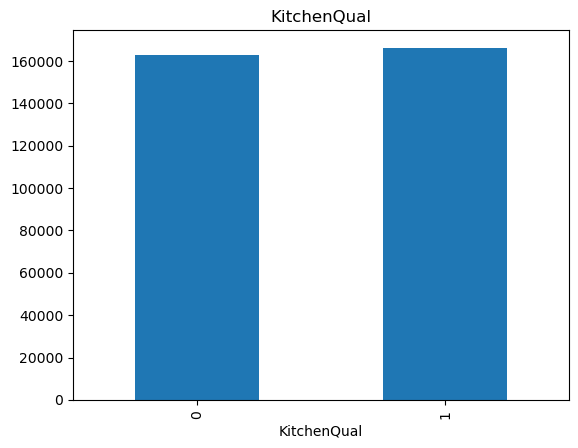

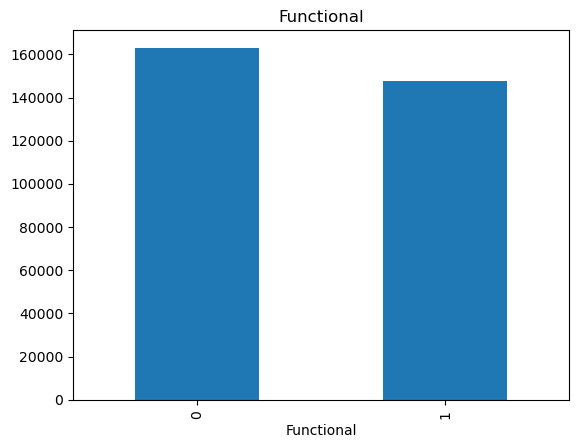

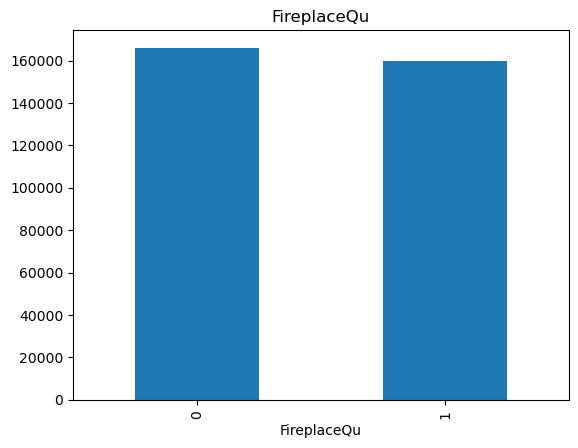

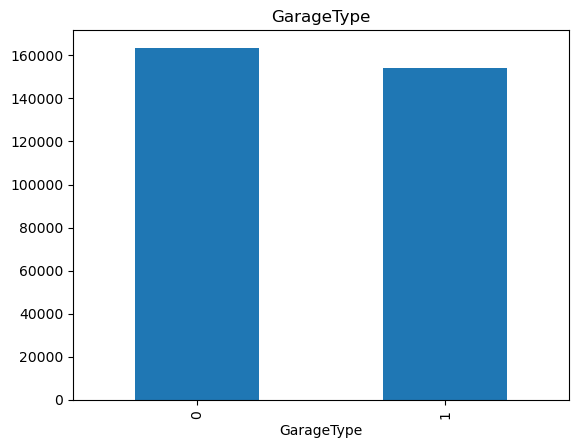

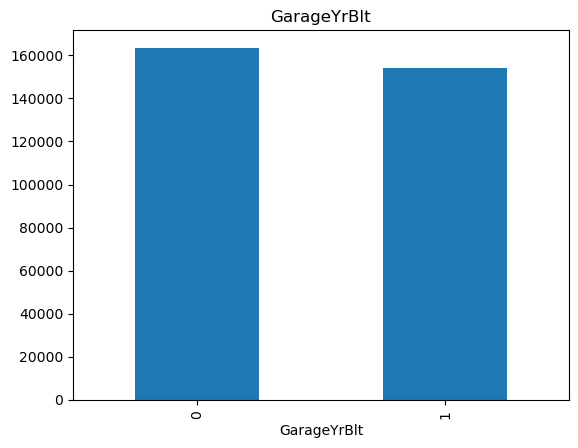

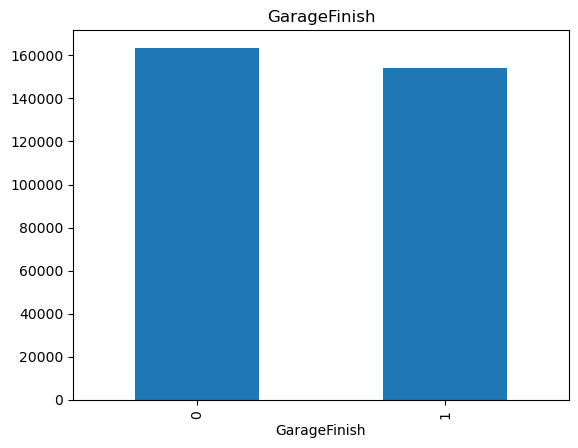

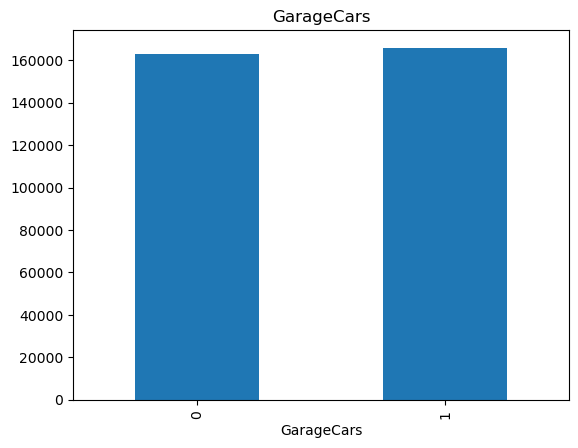

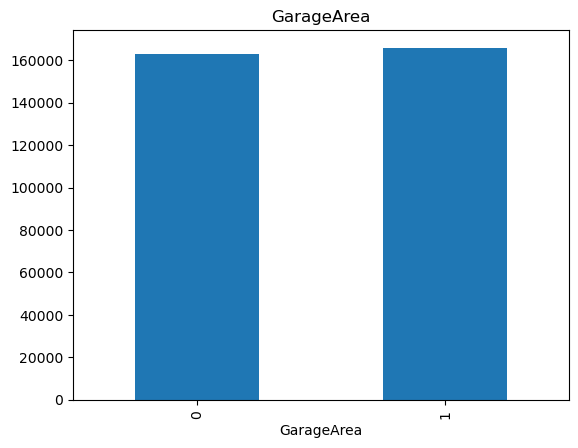

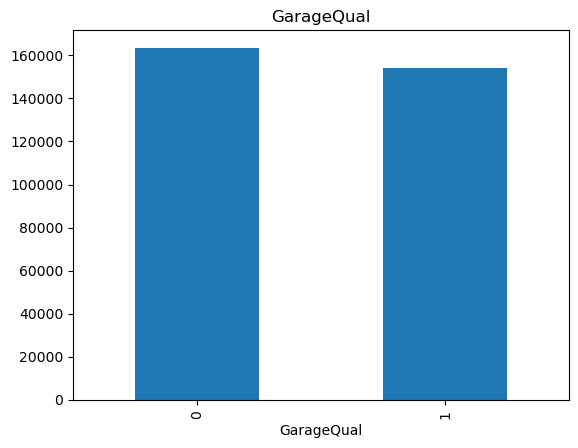

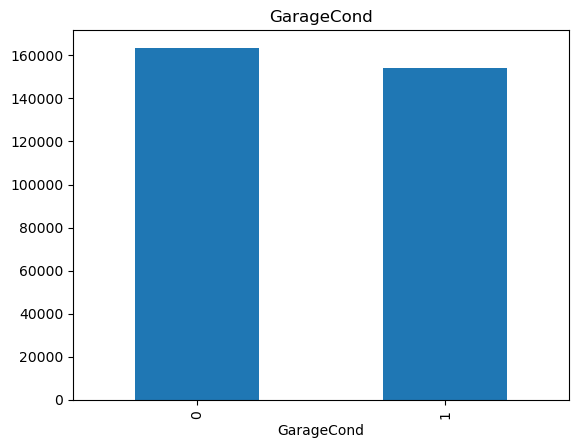

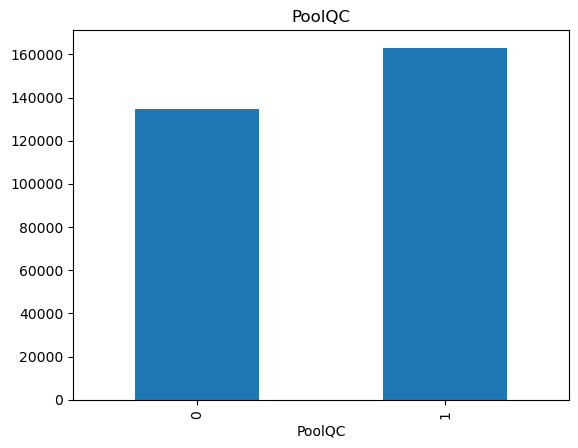

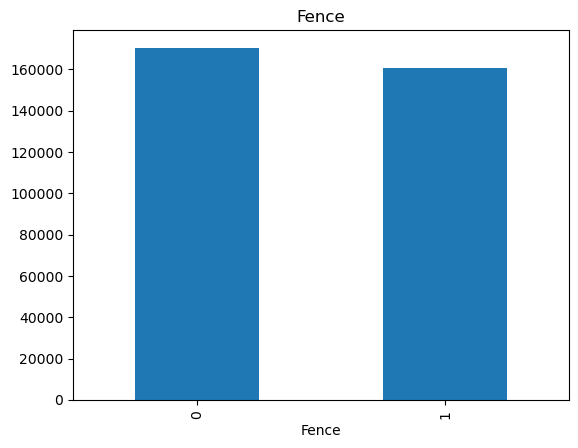

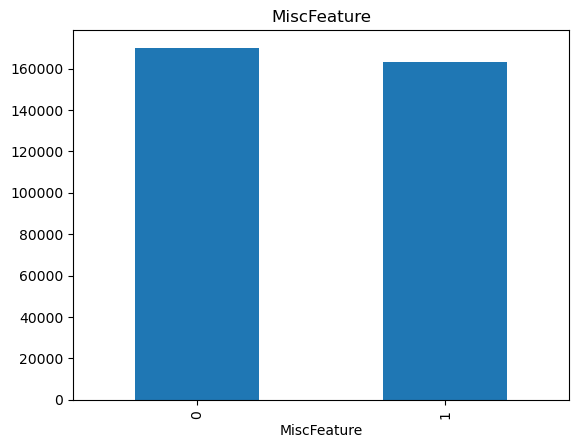

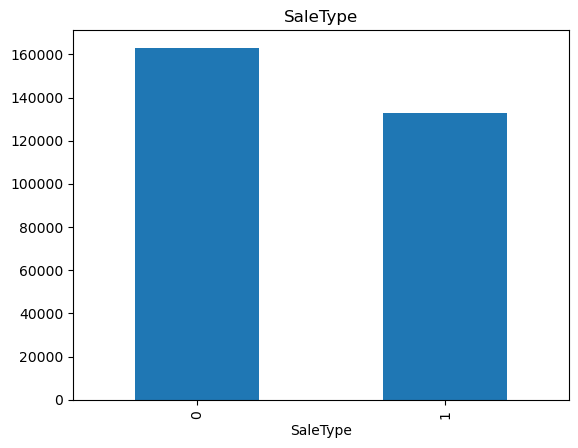

In [17]:
for feature in feature_with_na:
    data = ds.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [50]:
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461.0,20.0,RH,80.0,11622.0,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5.0,6.0,1961.0,1961.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,TA,5.0,Typ,0.0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140.0,0.0,0.0,0.0,120.0,0.0,Missing,MnPrv,Missing,0.0,6.0,2010.0,WD,Normal,208500
1,1462.0,20.0,RL,81.0,14267.0,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6.0,6.0,1958.0,1958.0,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,Gd,6.0,Typ,0.0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393.0,36.0,0.0,0.0,0.0,0.0,Missing,Missing,Gar2,12500.0,6.0,2010.0,WD,Normal,181500
2,1463.0,60.0,RL,74.0,13830.0,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5.0,5.0,1997.0,1998.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212.0,34.0,0.0,0.0,0.0,0.0,Missing,MnPrv,Missing,0.0,3.0,2010.0,WD,Normal,223500
3,1464.0,60.0,RL,78.0,9978.0,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6.0,6.0,1998.0,1998.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360.0,36.0,0.0,0.0,0.0,0.0,Missing,Missing,Missing,0.0,6.0,2010.0,WD,Normal,140000
4,1465.0,120.0,RL,43.0,5005.0,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8.0,5.0,1992.0,1992.0,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,Gd,5.0,Typ,0.0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0.0,82.0,0.0,0.0,144.0,0.0,Missing,Missing,Missing,0.0,1.0,2010.0,WD,Normal,250000


In [18]:
print(len(ds.Id))

1460


### Numerical Variable

In [24]:
numerical_feature = [feature for feature in ds.columns if ds[feature].dtypes != 'O']

print(len(numerical_feature))
ds[numerical_feature].head()

38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,208500
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,181500
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,223500
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,140000
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,250000


### Temporal Variable

In [25]:
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [26]:
for feature in year_feature:
    print(feature, ds[feature].unique())

YearBuilt [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971. 1975. 2009.
 2005. 2003. 2002. 2006. 2004. 1920. 1974. 2000. 2010. 1967. 1978. 1966.
 1964. 1962. 1952. 1949. 1959. 1956. 1955. 1948. 1960. 1963. 1900. 1957.
 1938. 1923. 1890. 1910. 1922. 1950. 1925. 1939. 1940. 1942. 1936. 1930.
 1915. 1912. 1917. 1907. 1968. 1977. 1927. 1947. 1954. 1987. 1996. 1972.
 1945. 1924. 1931. 1941. 1994. 1989. 1921. 1896. 1976. 2008. 1965. 1973.
 1984. 1985. 1991. 1969. 1995. 1980. 2007. 1986. 1981. 1951. 1953. 1935.
 1902. 1946. 1934. 1983. 1880. 1979. 2001. 1916. 1918. 1988. 1937. 1905.
 1928. 1926. 1929. 1914. 1895. 1982. 1879. 1901. 1919. 1932.   nan]
YearRemodAdd [1961. 1958. 1998. 1992. 1994. 2007. 1990. 1970. 1999. 1971. 1975. 2010.
 2005. 2006. 2004. 2002. 1950. 1993. 2000. 2003. 1967. 1978. 1966. 1964.
 2001. 2008. 2009. 1959. 1956. 1952. 1955. 1960. 1984. 1954. 1957. 1962.
 1997. 1980. 1968. 1987. 1979. 1996. 1972. 1985. 1991. 1989. 1977. 1976.
 1973. 1986. 1969. 1995. 1974. 19

Text(0.5, 1.0, 'House Price vs YearSold')

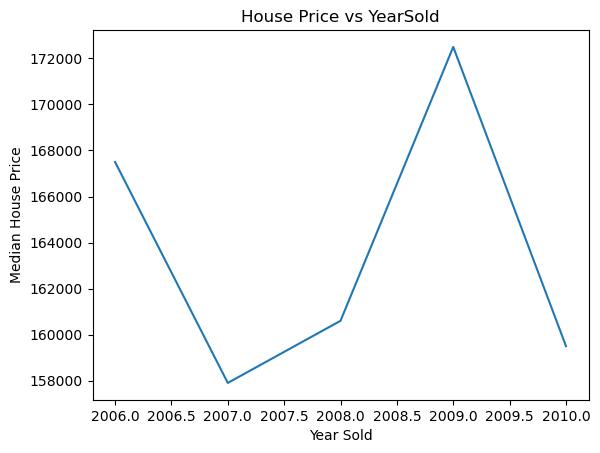

In [27]:
ds.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

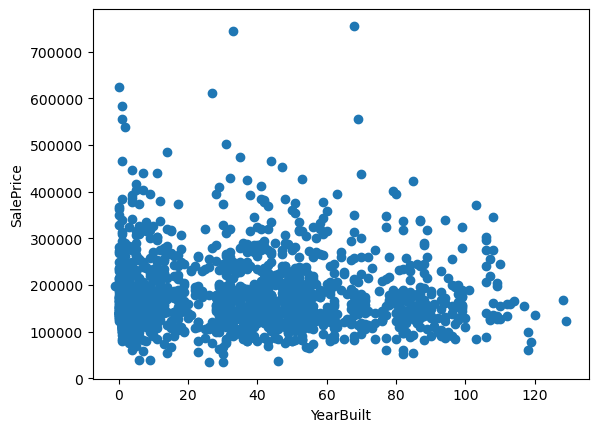

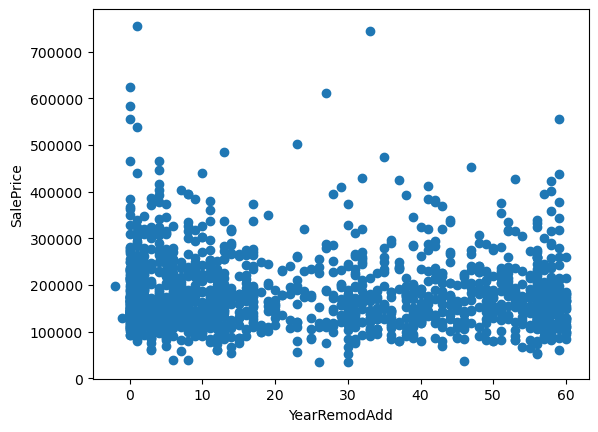

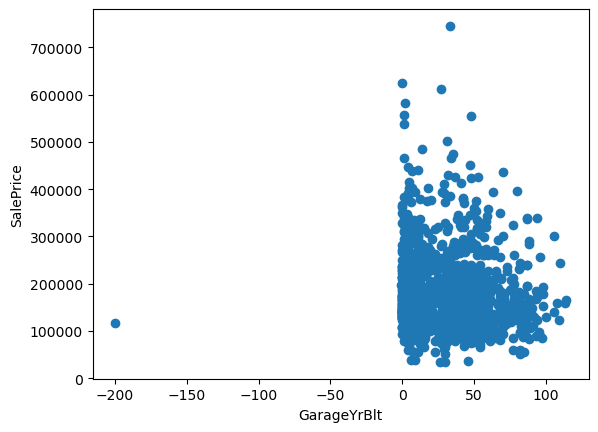

In [28]:
## difference  bw year and sale price
for feature in year_feature:
    if feature != 'YrSold':
        data = ds.copy()
        
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### Categorical Variable

In [30]:
categorical_feature = [feature for feature in ds.columns if data[feature].dtypes == 'O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']